# Task 4.10 Cont. 

### 5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### 6) Create an appropriate visualization to show the distribution of profiles.
### 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
### 9) Produce suitable charts to illustrate your results and export them in your project folder.¶
### 10) Tidy up your script, export your final data set, and save your notebook.


In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Güldeniz\Desktop\Career Foundry\2. Data Immersion\Achievement 4\Instacart  Basket Analysis'

In [3]:
#Importing latest data

df_all = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_all_final.1.pkl'))

In [4]:
df_all.shape

(32404859, 34)

##### 5) Customer profiles

In [5]:
# 1) Flag for 'Young single adult' (age between 18 and 34, income group: low and middle, department_id: frozen, produce, beverages, diary eggs, snacks, canned goods; parental_status: non parent)

Young_single_profile = df_all.loc[(df_all['age_group'].isin(['18-24','25-34'])) & (df_all['income_groups'].isin(['low income', 'middle income'])) & (df_all['department_id'].isin([1, 4, 7, 15, 16, 19])) & (df_all['parental_status'] == 'non parent'), 'customer_profile'] = 'Young single adult'

In [6]:
# 2) Flag for 'Single adult' (age: <55 - >34, income: middle- middle-high, department_id: frozen, produce, alcohol, beverages, diary eggs, snacks; parental_status: non parent)

Single_adult_pofile = df_all.loc[(df_all['age_group'].isin(['35-44', '45-54'])) & (df_all['income_groups'].isin(['middle income', 'middle high income'])) & (df_all['department_id'].isin([1, 4, 5, 7, 16, 19])) & (df_all['parental_status'] == 'non parent'), 'customer_profile'] = 'Single adult'

In [7]:
# 3) Flag for 'Young parent' (age: 18> - <35, income: low, middle, department_id: frozen, produce, beverages, diary eggs, snacks, canned goods, babies; parental_status: parent)

Young_parent_profile = df_all.loc[(df_all['age_group'].isin(['18-24','25-34'])) & (df_all['income_groups'].isin(['low income','middle income'])) & (df_all['department_id'].isin([1, 4, 7, 16, 18])) & (df_all['parental_status'] == 'parent'), 'customer_profile'] = 'Young parent'

In [8]:
# 4) Flag for 'Active Parent' (age: 35 <= age <65, income: middle, middle high, department_id: frozen, produce, beverages, diary eggs, snacks, babies, deli; parental_status: parent)

Active_parent_profile = df_all.loc[(df_all['age_group'].isin(['35-44', '55-64'])) & (df_all['income_groups'].isin(['middle income', 'middle high income'])) & (df_all['department_id'].isin([1, 4, 7, 16, 18, 19])) & (df_all['parental_status'] == 'parent'), 'customer_profile'] = 'Active parent'

In [9]:
# 5) Flag for 'retired' (age: => 65, income: low, middle, department_id: frozen, produce, beverages, diary eggs, snacks,meat seafood)

Retired_profile = df_all.loc[(df_all['age_group'].isin(['65-74', '75+'])) & (df_all['income_groups'].isin(['low income', 'middle income'])) & (df_all['department_id'].isin([1, 4, 7, 12, 16, 19])), 'customer_profile'] = 'Retired'

In [10]:
# 6) Flag for 'luxus profile' (age: 35 < age< 55, income: >300000, department_id: frozen, produce, beverages, diary eggs, snacks, household)

Luxus_profile = df_all.loc[(df_all['age_group'].isin(['35-44', '45-54'])) & (df_all['income_groups'].isin(['high income', 'very high income'])) & (df_all['department_id'].isin([1, 4, 7, 16, 17,19])), 'customer_profile'] = 'Luxus'

In [11]:
#Check customer profiles

df_all['customer_profile'].value_counts(dropna = False)

NaN                   18181879
Young parent           3989596
Active parent          3700033
Retired                3676782
Young single adult     1564603
Single adult           1218250
Luxus                    73716
Name: customer_profile, dtype: int64

In [12]:
df_all['customer_profile'].shape

(32404859,)

In [13]:
pd.options.display.max_rows = None

In [14]:
# Check if everything went smoothly

df_all[['user_id', 'customer_profile']].head(50)

,user_id,customer_profile
0,1,Young parent
1,1,Young parent
2,1,Young parent
3,1,Young parent
4,1,Young parent
5,1,Young parent
6,1,Young parent
7,1,Young parent
8,1,Young parent
9,1,Young parent


In [15]:
df_all[['user_id', 'customer_profile']].tail(50)

,user_id,customer_profile
32404809,11534,Retired
32404810,105857,NaN
32404811,105857,NaN
32404812,105857,NaN
32404813,105857,NaN
32404814,105857,NaN
32404815,105857,NaN
32404816,38979,Active parent
32404817,38979,Active parent
32404818,38979,Active parent


In [16]:
# transform all NaN values  to the same value for each user_id 

df_all['customer_profile'] = df_all.groupby('user_id')['customer_profile'].transform('first')

In [17]:
#Control again

df_all[['user_id', 'customer_profile']].head(50)

,user_id,customer_profile
0,1,Young parent
1,1,Young parent
2,1,Young parent
3,1,Young parent
4,1,Young parent
5,1,Young parent
6,1,Young parent
7,1,Young parent
8,1,Young parent
9,1,Young parent


In [18]:
df_all[['user_id', 'customer_profile']].tail(50)

,user_id,customer_profile
32404809,11534,Retired
32404810,105857,None
32404811,105857,None
32404812,105857,None
32404813,105857,None
32404814,105857,None
32404815,105857,None
32404816,38979,Active parent
32404817,38979,Active parent
32404818,38979,Active parent


In [19]:
# impute all empty cells with 'Other'

df_all['customer_profile'].fillna('Other', inplace=True)

In [20]:
df_all[['user_id', 'customer_profile']].tail(50)

,user_id,customer_profile
32404809,11534,Retired
32404810,105857,Other
32404811,105857,Other
32404812,105857,Other
32404813,105857,Other
32404814,105857,Other
32404815,105857,Other
32404816,38979,Active parent
32404817,38979,Active parent
32404818,38979,Active parent


In [21]:
#Controlthe shape

df_all.shape

(32404859, 35)

In [22]:
# Check unique value counts (how many unique customers are there in each?)

customer_profiles = df_all.groupby('customer_profile')['user_id'].nunique().sort_values(ascending=False)

In [23]:
# Checking unique customer profiles

customer_profiles

customer_profile
Other                 76285
Young parent          40588
Retired               33845
Active parent         31014
Young single adult    13673
Single adult          10399
Luxus                   405
Name: user_id, dtype: int64

### 6) Visualization to show distribution of customer profiles

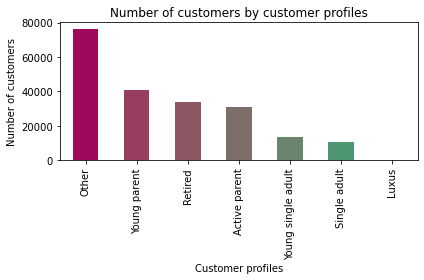

In [24]:
# Distribution of customer profiles bar chart

customer_profile_bar = customer_profiles.plot.bar( color =['#9f095b', '#973d60', '#8c5865', '#7e6e6a', '#6c836e', '#4f9673', '#00a878'], xlabel= 'Customer profiles', ylabel= 'Number of customers', title = 'Number of customers by customer profiles')
plt.tight_layout()

In [25]:
# Export the chart in the form of an image file

customer_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_distribution_bar.png'))

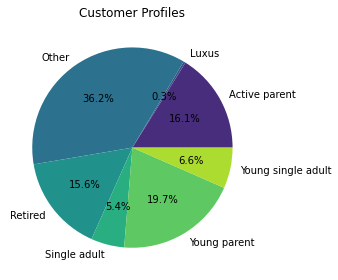

In [26]:
# Distribution of customer profiles  
customers_pie = df_all['customer_profile'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('viridis',7), title = 'Customer Profiles')
plt.ylabel('')
plt.tight_layout()

In [27]:
# Export customer profiles

customers_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_pie.png'))

### 7) Aggregate the max, mean, and min variables on customer profile level for frequency and expenditure

##### Descriptive Statistics for customer profiles 

In [28]:
# 1) Brand loyalty of customer profiles (The mean, min & max of usage frequency, grouped by customer_profile)

shopping_frequency = df_all.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max', 'sum']})

In [29]:
# result

shopping_frequency

days_since_prior_order                     
                                     mean min max          sum
customer_profile                                              
Active parent                   10.391295   0  30   54256037.0
Luxus                            9.548750   0  30    1025297.0
Other                           10.377217   0  30  121855679.0
Retired                         10.424989   0  30   52778196.0
Single adult                    10.357310   0  30   18049426.0
Young parent                    10.397127   0  30   66487717.0
Young single adult              10.462390   0  30   22320652.0

In [30]:
# copy to clipboard

shopping_frequency.to_clipboard()

In [31]:
# 2) differences in ordering habits regarding loyalty status
ordering_by_profiles = pd.crosstab(df_all['customer_profile'], df_all['loyalty_flag'], dropna= False)

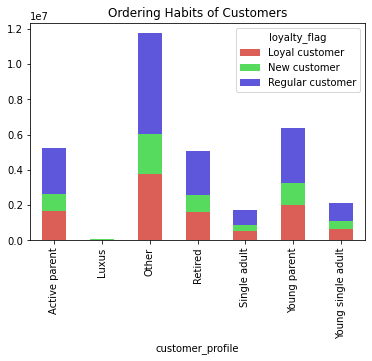

In [32]:
ordering_habits = ordering_by_profiles.plot.bar(stacked = True, color = sns.color_palette('hls', 3), title= 'Ordering Habits of Customers')

In [33]:
# Exporting ordering habits of customer profiles

ordering_habits.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ordering_habits_bar.png'))

In [35]:
#Save the crosstab

ordering_by_profiles.to_clipboard()

In [36]:
# 3) Expenditure by customer profiles (Mean and sum of the expenditure, grouped by customer_profile)

spending = df_all.groupby('customer_profile').agg({'prices': ['mean', 'sum']})

In [37]:
#Result for expenditure
spending

prices            
                        mean         sum
customer_profile                        
Active parent       7.962741  41572164.1
Luxus               7.826476    832384.9
Other               7.740111  90865244.6
Retired             7.680336  38881992.7
Single adult        7.964650  13878849.5
Young parent        7.786942  49794178.3
Young single adult  7.781820  16601306.5

In [38]:
# copy to clipboard

spending.to_clipboard()

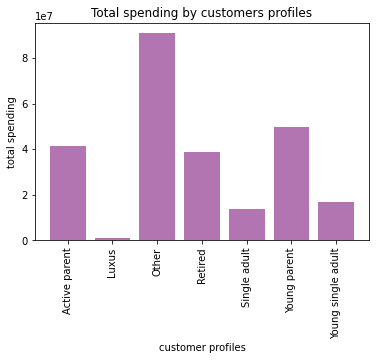

In [39]:
## Total spending of Customer Profiles:

# Create data set

height = [41572164.1, 832384.9, 90865244.6, 38881992.7, 13878849.5, 49794178.3, 16601306.05]
bars = ('Active parent', 'Luxus', 'Other', 'Retired', 'Single adult', 'Young parent', 'Young single adult')
y_pos = np.arange(len(bars))

#Create bars and colors, rotation of names on y axis
plt.bar(y_pos, height, color = (0.5, 0.1, 0.5, 0.6))


#Add title and axis name
plt.title('Total spending by customers profiles')
plt.xlabel('customer profiles')
plt.ylabel('total spending')

#Create names on the x axis
plt.xticks(y_pos, bars, rotation=90)


#Show graph
plt.show()


In [40]:
# Exporting total spending of customer profiles

plt.savefig('Total spending by customers profiles.png')

<Figure size 432x288 with 0 Axes>

In [41]:
# 4) Differences in spending habits
spending_by_profiles = pd.crosstab(df_all['customer_profile'], df_all['spending_flag'], dropna= False)

In [42]:
#Copy

spending_by_profiles.to_clipboard()

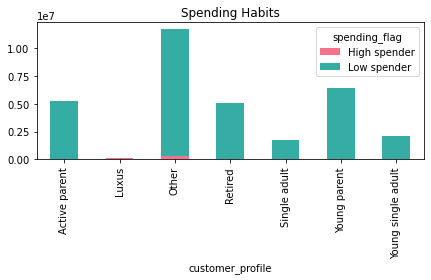

In [43]:
#Spending habits plot bar

spending_habits = spending_by_profiles.plot.bar(stacked = True, color = sns.color_palette('husl', 2), title= 'Spending Habits')
plt.tight_layout()

In [44]:
# Exporting spending habits of customer profiles

spending_habits.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','spending_habits_bar.png'))

### 8) Compare customer profiles with regions and departments.
### 9) Produce suitable charts to illustrate your results.

##### Customer profiles by regions

In [45]:
# crosstab of customer profiles & regions

profiles_by_region = pd.crosstab(df_all['customer_profile'], df_all['region'], dropna = False)

In [46]:
# Result
profiles_by_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Active parent,1231382,911347,1655272,1423296
Luxus,26405,15271,33068,32631
Other,2749334,2091986,3650851,3250445
Retired,1176598,904683,1574077,1407304
Single adult,432141,281084,546075,483375
Young parent,1500048,1122724,2021009,1751035
Young single adult,481417,395641,674509,581851


In [47]:
#Copy to clipboard

profiles_by_region.to_clipboard()

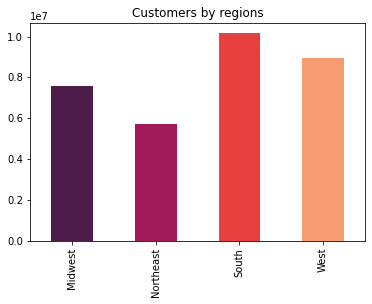

In [48]:
# All customers across regions

regions_bar = df_all['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('rocket', 4), title = 'Customers by regions')

In [49]:
#Export chart

regions_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regions_bar.png'))

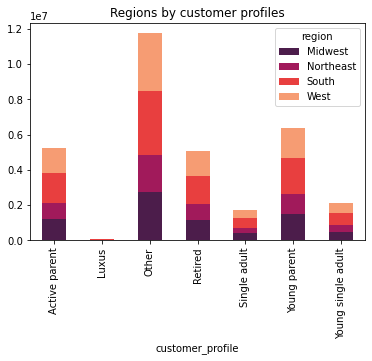

In [50]:
# Bar chart for regions by customer profiles

regions_by_profiles = profiles_by_region.plot.bar(stacked = True, color = sns.color_palette('rocket', 4), title='Regions by customer profiles')

In [51]:
#Export chart

regions_by_profiles.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regions_by_profiles.png'))

In [52]:
#Crosstab region and customer profiles

profiles_by_region1 = pd.crosstab(df_all['region'], df_all['customer_profile'], dropna = False)

In [53]:
profiles_by_region1

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
region,,,,,,,
Midwest,1231382,26405,2749334,1176598,432141,1500048,481417
Northeast,911347,15271,2091986,904683,281084,1122724,395641
South,1655272,33068,3650851,1574077,546075,2021009,674509
West,1423296,32631,3250445,1407304,483375,1751035,581851


In [54]:
#Copy to clipboard

profiles_by_region1.to_clipboard()

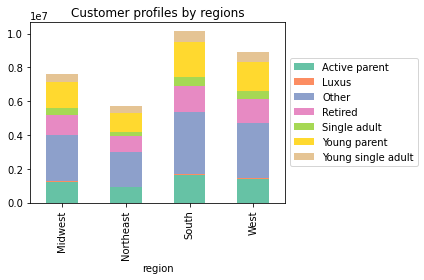

In [55]:
#Bar chart profiles by regions

profiles_by_regions = profiles_by_region1.plot.bar(stacked = True, color = sns.color_palette('Set2', 7), title= 'Customer profiles by regions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [56]:
#Export chart

profiles_by_regions.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_regions.png'))

In [57]:
#Crosstab prices and customer profiles

profiles_by_price_range = pd.crosstab(df_all['price_range_loc'], df_all['customer_profile'], dropna = False)

In [58]:
profiles_by_price_range

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
price_range_loc,,,,,,,
High-range product,73299,2641,147870,61614,23784,82162,26308
Low-range product,1549912,33008,3724433,1636486,515367,1998628,668487
Mid-range product,3598086,71726,7870313,3364562,1203524,4314026,1438623


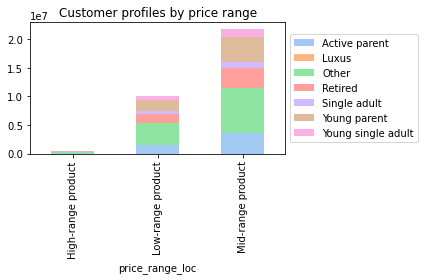

In [59]:
#Bar chart profiles by regions

profiles_by_price = profiles_by_price_range.plot.bar(stacked = True, color = sns.color_palette('pastel', 7), title= 'Customer profiles by price range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [60]:
#Export chart

profiles_by_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_price_range.png'))

In [61]:
#Crosstab loyalty and customer profiles

profiles_by_loyalty = pd.crosstab(df_all['loyalty_flag'], df_all['customer_profile'], dropna = False)

In [62]:
profiles_by_loyalty

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
loyalty_flag,,,,,,,
Loyal customer,1670059,44767,3746381,1592755,554856,2012947,662328
New customer,982998,10317,2279579,995556,322749,1231017,421774
Regular customer,2568240,52291,5716656,2474351,865070,3150852,1049316


In [63]:
#Copy to clipboard

profiles_by_loyalty.to_clipboard()

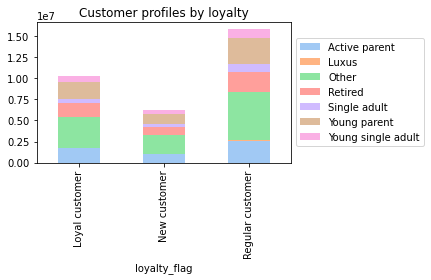

In [64]:
profiles_by_loyalty_bar = profiles_by_loyalty.plot.bar(stacked = True, color = sns.color_palette('pastel', 7), title= 'Customer profiles by loyalty')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [65]:
#Export chart

profiles_by_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_loyalty.png'))

In [66]:
#Crosstab order frequency and customer profiles

profiles_by_order_frequency = pd.crosstab(df_all['frequency_flag'], df_all['customer_profile'], dropna = False)

In [155]:
profiles_by_order_frequency

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
frequency_flag,,,,,,,
Frequent customer,3694023,78260,8253441,3557410,1231122,4494519,1487884
Non-frequent customer,420461,6797,983271,428659,135524,537104,174912
Regular customer,1106813,22318,2505904,1076593,376029,1363193,470622


In [68]:
# Copy to clipboard

profiles_by_order_frequency.to_clipboard()

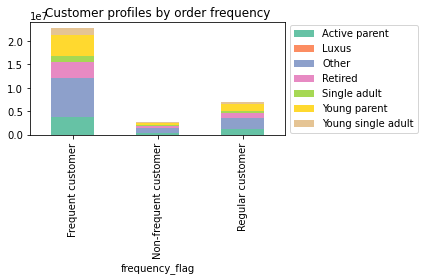

In [69]:
profiles_by_frequency_bar = profiles_by_order_frequency.plot.bar(stacked = True, color = sns.color_palette('Set2', 7), title= 'Customer profiles by order frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [70]:
#Export chart

profiles_by_frequency_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_orders.png'))

In [71]:
#Crosstab order depts and customer profiles

profiles_by_departments = pd.crosstab(df_all['department'], df_all['customer_profile'], dropna = False)

In [72]:
profiles_by_departments

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
department,,,,,,,
NaN,10954,106,24853,10623,3796,13942,4871
alcohol,22404,1999,58821,21893,9258,29906,9415
babies,73125,939,151968,62152,25583,81532,28503
bakery,191847,5207,422473,179695,65489,229878,77839
beverages,410439,9775,996357,434069,138180,522867,176436
breakfast,107604,2646,258935,111068,36279,140298,46203
bulk,5253,15,12472,5755,1796,7049,2233
canned goods,178706,3799,380935,162574,59797,212230,70017
dairy eggs,880630,19161,1943967,833661,293163,1072187,355978


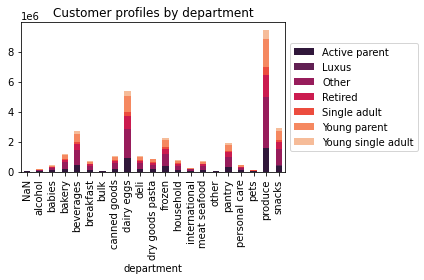

In [73]:
#Bar

profiles_by_departments_bar = profiles_by_departments.plot.bar(stacked = True, color = sns.color_palette('rocket', 7), title= 'Customer profiles by department')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [74]:
#Export chart

profiles_by_departments_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_departments.png'))

In [75]:
#Crosstab order depts and customer profiles

profiles_by_spending = pd.crosstab(df_all['spending_flag'], df_all['customer_profile'], dropna = False)

In [76]:
profiles_by_spending

customer_profile,Active parent,Luxus,Other,Retired,Single adult,Young parent,Young single adult
spending_flag,,,,,,,
High spender,73434,107375,336743,33868,22212,48314,12299
Low spender,5147863,0,11405873,5028794,1720463,6346502,2121119


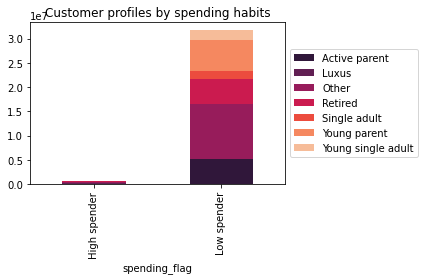

In [77]:
# Bar

profiles_by_spending_bar = profiles_by_spending.plot.bar(stacked = True, color = sns.color_palette('rocket', 7), title= 'Customer profiles by spending habits')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [78]:
#Export chart

profiles_by_spending_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','profiles_by_spendings.png'))

### Visualizations for further insights

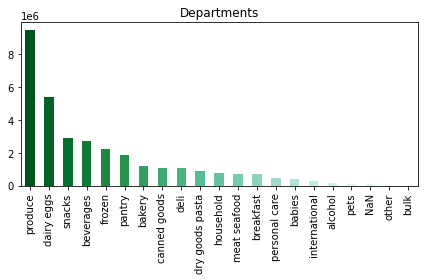

In [79]:
# 1) All departments 

all_departments_bar = df_all['department'].value_counts().plot.bar(color = sns.color_palette("BuGn_r", 21), title='Departments')
plt.tight_layout()

In [80]:
# Exporting bar chart for departments
all_departments_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','all_departments.png'))

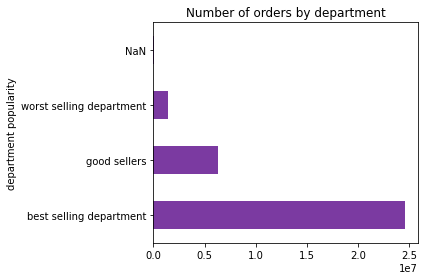

In [81]:
# 2) bar chart based on orders by department popularity

dept_popularity_bar = df_all['department_popularity'].value_counts().plot.barh(color =['#7b3aa1'], xlabel= 'department popularity', ylabel= 'Number of orders', title = 'Number of orders by department')
plt.tight_layout()

In [82]:
# Exporting top selling departments

dept_popularity_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_popularity.png'))

### Customers

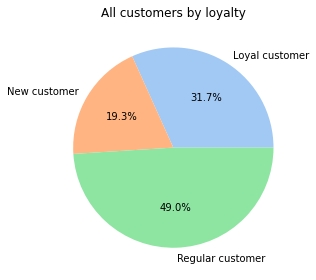

In [83]:
# 1) distribution of customers - Loyalty 
loyalty_pie = df_all['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel',3), title = 'All customers by loyalty')
plt.ylabel('')
plt.tight_layout()

In [84]:
# Export pie chart 

loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

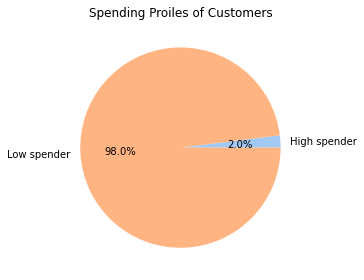

In [85]:
# 2) distribution of customers - Spending 
spending_pie = df_all['spending_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel',2), title = 'Spending Proiles of Customers')
plt.ylabel('')
plt.tight_layout()

In [86]:
# Export pie chart 

spending_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_pie.png'))

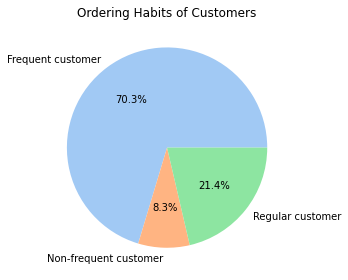

In [87]:
# 3) Customer distribution-order regularity

ordering_pie = df_all['frequency_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel',4), title = 'Ordering Habits of Customers')
plt.ylabel('')
plt.tight_layout()

In [88]:
# Export pie chart 

ordering_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_frequency_pie.png'))

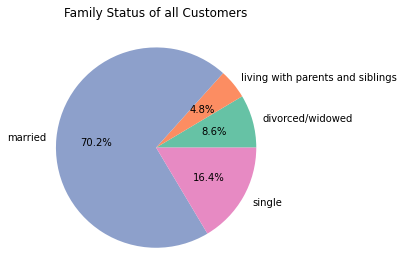

In [89]:
# 4) Family status

family_status_pie = df_all['family_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2',4), title='Family Status of all Customers')
plt.ylabel('')
plt.tight_layout()

In [90]:
# Export pie chart 

family_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_stat_pie.png'))

##### Days and day times

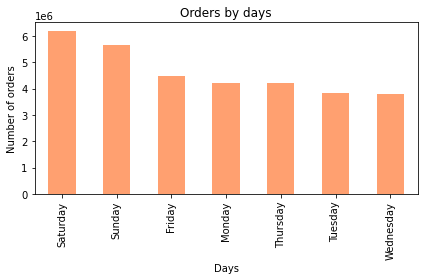

In [91]:
# 1) Bar chart for days and orders
days_of_week_bar = df_all['day_of_week'].value_counts().plot.bar(color =['#ffa070'], xlabel= 'Days', ylabel= 'Number of orders', title = 'Orders by days')
plt.tight_layout()

In [92]:
# Exporting orders by days

days_of_week_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_by_days.png'))

In [93]:
# 2) Sales for each weekday

total_sales_weekday = df_all.groupby('day_of_week').agg({'prices': ['sum']})

Text(0, 0.5, 'total_sales')

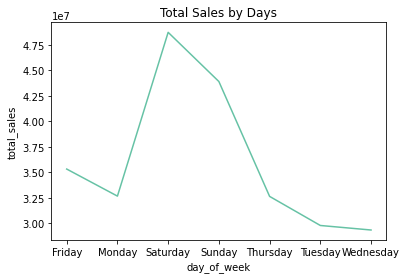

In [94]:
# Create a line chart of mean prices 

total_sales_line_by_days = total_sales_weekday.plot.line(legend = False, color = sns.color_palette('Set2', 1), title='Total Sales by Days')
plt.ylabel('total_sales')

In [95]:
# Export mean price per weekday
total_sales_line_by_days.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','total_sales_by_day.png'))

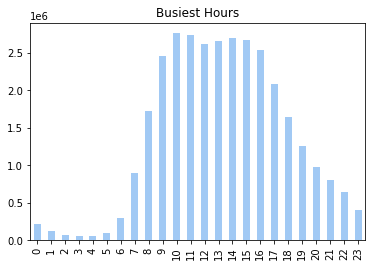

In [96]:
# 3) Busiest hours of the day
busiest_hours = df_all['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('pastel', 1), title='Busiest Hours')

In [97]:
# Exporting busiest hours

busiest_hours.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','obusiest_hours_bar.png'))

In [98]:
# 4) Crosstab with top selling departments for part of the day 

top_departments_day_time = pd.crosstab(df_all['department_popularity'], df_all['day_time'], dropna = False)

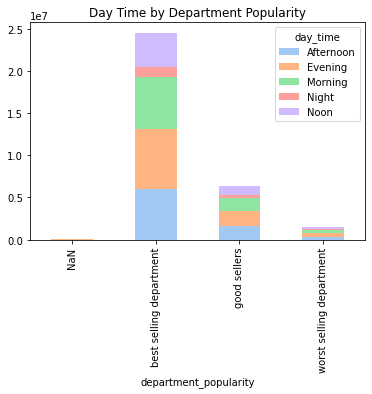

In [99]:
# bar chart for top selling departments during time of day 
top_departments_day_time_bar = top_departments_day_time.plot.bar(stacked = True, color = sns.color_palette('pastel', 5), title= 'Day Time by Department Popularity')

In [100]:
#Exporting chart

top_departments_day_time_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_dept_day_time_bar.png'))

In [101]:
# 5) Crosstab with top selling departments for part of the day 

departments_by_day_time = pd.crosstab(df_all['day_time'], df_all['department_popularity'], dropna = False)

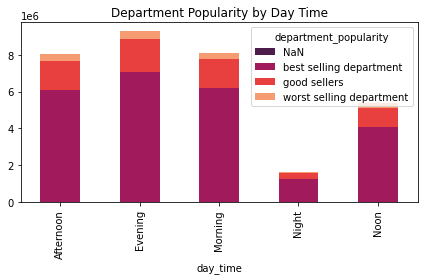

In [102]:
# bar chart for top selling departments during time of day 

departments_by_day_time_bar = departments_by_day_time.plot.bar(stacked = True, color = sns.color_palette('rocket', 4), title= 'Department Popularity by Day Time')
plt.tight_layout()

In [103]:
#Exporting chart

departments_by_day_time_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_by_day_time.png'))

##### Age groups

In [104]:
# 1) Crosstab for department name and age group for visualization

department_age = pd.crosstab(df_all['department'], df_all['age_group'], dropna = False)

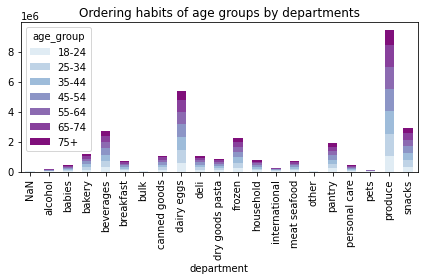

In [105]:
dept_age_bar = department_age.plot.bar(stacked = True, color = sns.color_palette('BuPu', 7), title= 'Ordering habits of age groups by departments')
plt.tight_layout()

In [106]:
# Export department orders and age

dept_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_age.png'))

In [107]:
# 2) Best selling deptartment

df_all['best_selling'] = df_all['department_popularity']=='best selling department'

In [108]:
# Crosstab for best selling departments and age groups.=> Top 3 departments make up more than 50% of all sales: produce, dairy eggs, and beverages

best_departments_age = pd.crosstab(df_all['best_selling'], df_all['age_group'], dropna = False)

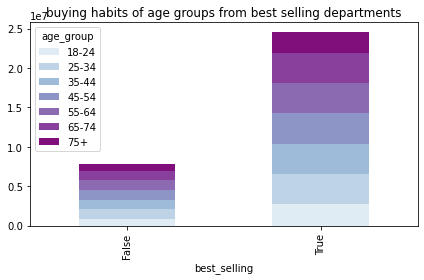

In [109]:
# True=> best sellign departments: produce, diary eggs, and beverage
# False => all other items

best_departments_age_bar = best_departments_age.plot.bar(stacked = True, color = sns.color_palette('BuPu', 7), title= 'buying habits of age groups from best selling departments')
plt.tight_layout()

In [110]:
# Export best selling department and age

best_departments_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','best_dept_age.png'))

##### Income groups

In [111]:
# 1) Crosstab for departments and income for visualization

department_income = pd.crosstab(df_all['department'], df_all['income_groups'], dropna = False)

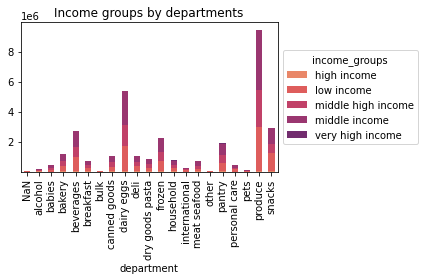

In [112]:
# Bar chart

department_income_bar = department_income.plot.bar(stacked = True, color = sns.color_palette('flare', 5), title='Income groups by departments')
plt.legend(title = 'income_groups',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [113]:
# Export department orders and income

department_income_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_income.png'))

In [114]:
#2)
# Crosstab for departments and parental status for visualization

department_parenthood = pd.crosstab(df_all['department'], df_all['parental_status'], dropna = False)

In [115]:
department_parenthood

parental_status,non parent,parent
department,,
NaN,17088,52057
alcohol,39118,114578
babies,106494,317308
bakery,294405,878023
beverages,674442,2013681
breakfast,174577,528456
bulk,8278,26295
canned goods,264838,803220
dairy eggs,1349362,4049385


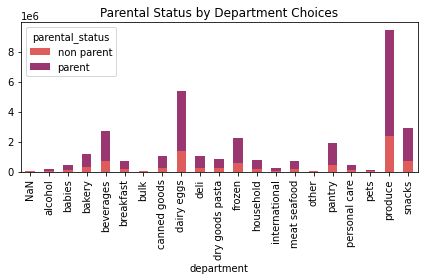

In [116]:
#Barplot

department_parent_bar = department_parenthood.plot.bar(stacked = True, color = sns.color_palette('flare', 2), title= 'Parental Status by Department Choices')
plt.tight_layout()

In [117]:
# Export chart

department_parent_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_parenthood.png'))

In [118]:
#  3) Crosstab for  family status in terms of ordering habits


fam_loyalty = pd.crosstab(df_all['family_status'], df_all['loyalty_flag'], dropna = False)

In [119]:
fam_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
family_status,,,
divorced/widowed,882722,530322,1358768
living with parents and siblings,492749,291210,766644
married,7202500,4393693,11160560
single,1706122,1028765,2590804


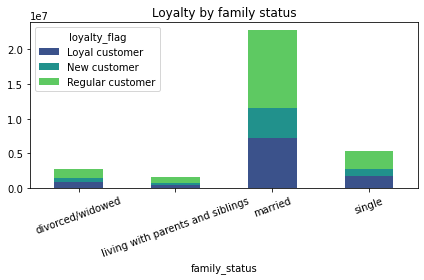

In [120]:
#barplot

fam_loyalty_bar = fam_loyalty.plot.bar(stacked = True, color = sns.color_palette('viridis', 3), title = 'Loyalty by family status')
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [121]:
# Export chart

fam_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fam_loyalty.png'))

In [122]:
#  4) Crosstab for age groups in terms of ordering habits

age_loyalty = pd.crosstab(df_all['age_group'], df_all['loyalty_flag'], dropna = False)

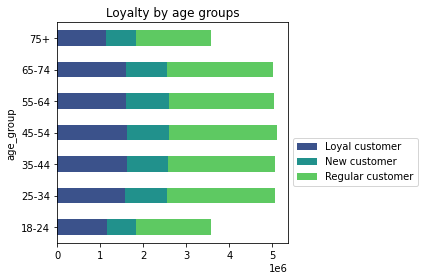

In [123]:
#Bar plot

age_loyalty_bar = age_loyalty.plot.barh(stacked = True, color = sns.color_palette('viridis', 3), title = 'Loyalty by age groups')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [124]:
# Export chart

age_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_loyalty.png'))

In [125]:
#  5) Crosstab for parental status in terms of ordering habits

parenthood_loyalty = pd.crosstab(df_all['parental_status'], df_all['loyalty_flag'], dropna = False)

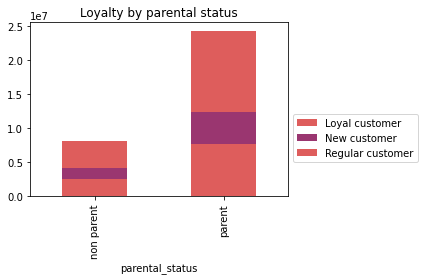

In [126]:
#Bar plot

parenthood_loyalty_bar = parenthood_loyalty.plot.bar(stacked = True, color = sns.color_palette('flare', 2), title = 'Loyalty by parental status')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [127]:
# Export chart

parenthood_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','parent_loyalty.png'))

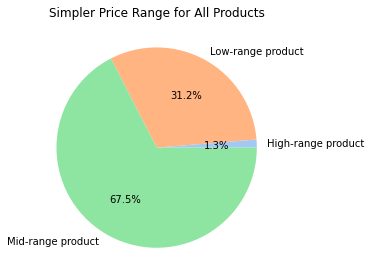

In [128]:
# 5) simple price range groupings: High-range, mid-range, low-range

price_range_pie = df_all['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('pastel', 4), title = 'Simpler Price Range for All Products')
plt.ylabel('')
plt.tight_layout()

In [129]:
# Export pie chart

price_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_pie.png'))

In [130]:
# 6) Ordering habits
cust_loyalty_ordering = pd.crosstab(df_all['loyalty_flag'], df_all['price_range_loc'], dropna = False)

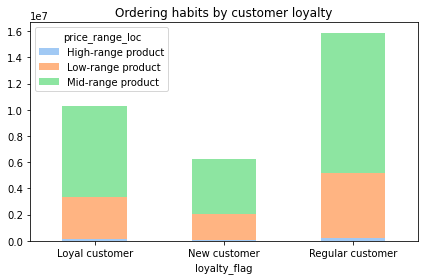

In [131]:
#barplot

loyalty_ordering_bar = cust_loyalty_ordering.plot.bar(stacked = True, color = sns.color_palette('pastel', 3), title = 'Ordering habits by customer loyalty')
plt.xticks(rotation= 0, horizontalalignment="center")
plt.tight_layout()

In [132]:
# Export chart

loyalty_ordering_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_loyalty.png'))

### Gender

In [133]:
# 1) crosstab gender and spending

gender_spending = pd.crosstab(df_all['gender'], df_all['spending_flag'], dropna = False)

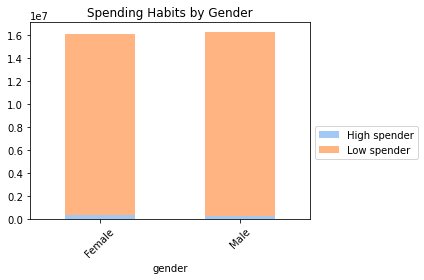

In [134]:
# Create gender and order

gender_spending_bar = gender_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('pastel', 2), title = 'Spending Habits by Gender')
plt.xticks(rotation= 45, horizontalalignment="center")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [135]:
# Export pie chart

gender_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_spending.png'))

In [136]:
# 2) crosstab gender and order frequency

gender_ordering = pd.crosstab(df_all['gender'], df_all['frequency_flag'], dropna = False)

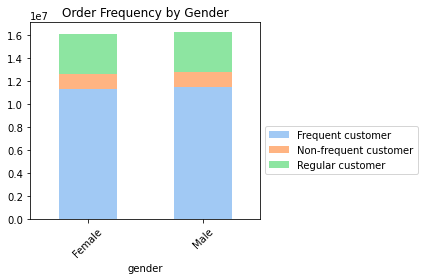

In [137]:
# Create gender and order

gender_ordering_bar = gender_ordering.plot(kind = 'bar', stacked = True, color = sns.color_palette('pastel', 3), title= 'Order Frequency by Gender')
plt.xticks(rotation= 45, horizontalalignment="center")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [138]:
# Export pie chart

gender_ordering_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gender_ordering habits.png'))

### Region frequency

In [139]:
# Region crosstab by order frequency

regions_by_ordering = pd.crosstab(df_all['region'], df_all['frequency_flag'], dropna = False)

In [140]:
#Copy to clipboard

regions_by_ordering.to_clipboard()

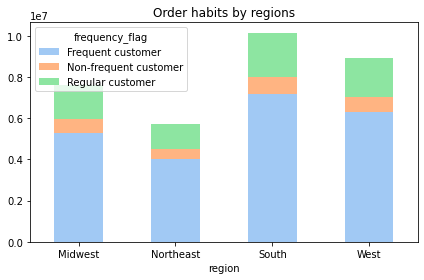

In [141]:
#Bar chart

region_ordering_bar = regions_by_ordering.plot(kind = 'bar', stacked = True, color = sns.color_palette('pastel', 3), title= 'Order habits by regions')
plt.xticks(rotation=0, horizontalalignment="center")
plt.tight_layout()

In [142]:
# Export pie chart

region_ordering_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ordering habits by regions.png'))

### Export latest data frame

In [143]:
# Export latest note book
df_all.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_all_final_1.2.pkl'))